# July 7-10, 2023: SINDy testing

In [1]:
import numpy as np 
import scipy as sp 
import pysindy as ps 
from tqdm import tqdm
import sklearn as skl

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow

# ignore user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

np.random.seed(1000)  # Seed for reproducibility

# Integrator keywords for solve_ivp
integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

(CVXPY) Aug 08 02:40:34 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Aug 08 02:40:34 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


## Simple illustrative systems

### Linear 2D ODE

In [2]:
# Generate training data

dt = 0.01
t_train = np.arange(0, 25, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [2, 0]
x_train = sp.integrate.solve_ivp(
    ps.utils.linear_damped_SHO, 
    t_train_span, 
    x0_train, 
    t_eval=t_train, 
    **integrator_keywords).y.T
x_train += np.random.normal(
    scale=0.05,
    size=x_train.shape,
)

# Fit the model

poly_order = 2
threshold = 0.09

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
    differentiation_method=ps.FiniteDifference(axis=-2),
    feature_names=['x', 'y'],
)
model.fit(x_train, t=dt)
model.print()

(x)' = -0.094 x + 1.966 y
(y)' = -1.983 x


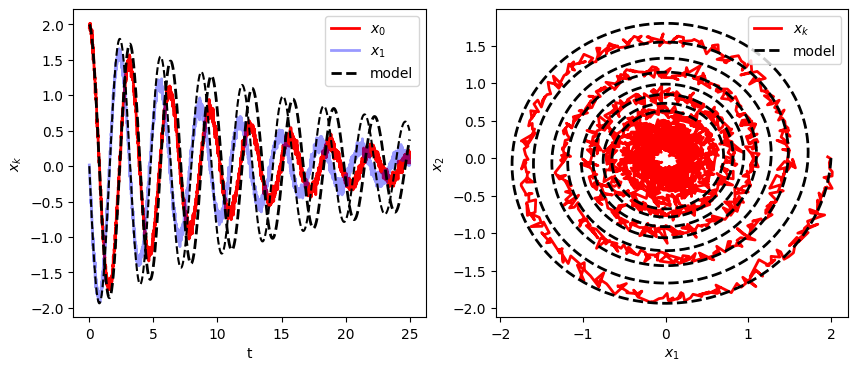

In [3]:
# Simulate and plot the results

x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

### Cubic 2D ODE

In [4]:
# Generate training data

dt = 0.01
t_train = np.arange(0, 25, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [2, 0]
x_train = sp.integrate.solve_ivp(
    ps.utils.cubic_damped_SHO, 
    t_train_span, 
    x0_train, 
    t_eval=t_train, 
    **integrator_keywords).y.T
x_train += np.random.normal(
    scale=0.0,
    size=x_train.shape,
)

In [5]:
# Fit the model

poly_order = 5
threshold = 0.05

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
    feature_names=['x', 'y'],
)
model.fit(x_train, t=dt)
model.print()

(x)' = -0.100 x^3 + 1.999 y^3
(y)' = -1.999 x^3 + -0.100 y^3


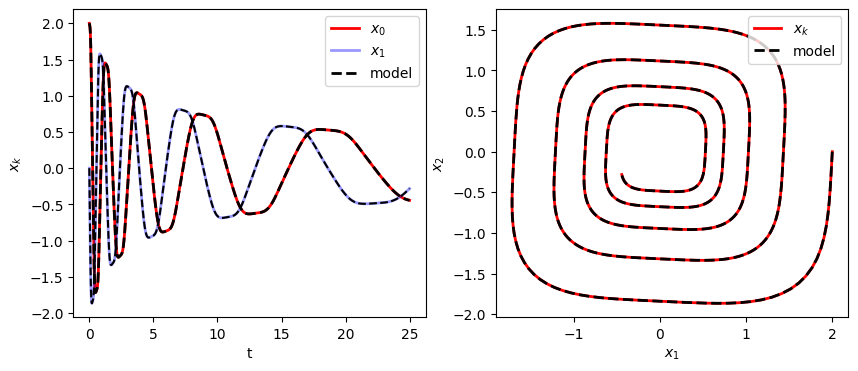

In [6]:
# Simulate and plot the results

x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

### Linear 3D ODE

In [7]:
# Generate training data

dt = 0.01
t_train = np.arange(0, 50, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [2, 0, 1]
x_train = sp.integrate.solve_ivp(
    ps.utils.linear_3D, 
    t_train_span, 
    x0_train, 
    t_eval=t_train, 
    **integrator_keywords).y.T

In [8]:
# Fit the model

poly_order = 5
threshold = 0.01

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
    feature_names=['x', 'y', 'z'],
)
model.fit(x_train, t=dt)
model.print()

(x)' = -0.100 x + 2.000 y
(y)' = -2.000 x + -0.100 y
(z)' = -0.300 z


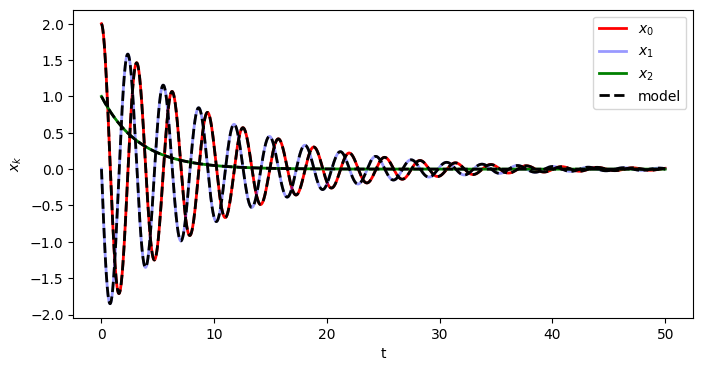

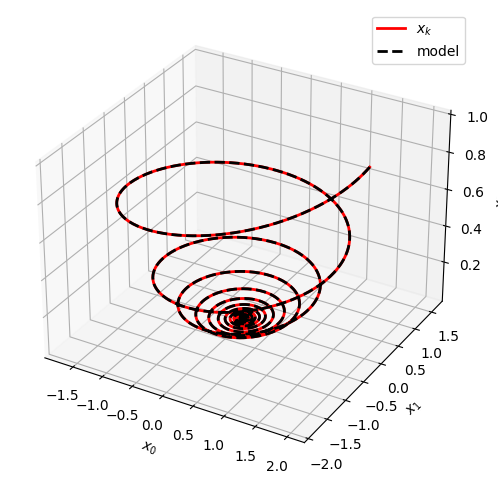

In [9]:
# Simulate and plot the results

x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig = plt.figure(figsize=(8, 4))
plt.plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
plt.plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
plt.plot(t_train, x_train[:, 2], "g", label="$x_2$", **plot_kws)
plt.plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
plt.plot(t_train, x_sim[:, 1], "k--", **plot_kws)
plt.plot(t_train, x_sim[:, 2], "k--", **plot_kws)
plt.legend()
plt.xlabel("t")
plt.ylabel("$x_k$")
fig.show()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x_train[:, 0], x_train[:, 1], x_train[:, 2], "r", label="$x_k$", **plot_kws)
ax.plot(x_sim[:, 0], x_sim[:, 1], x_sim[:, 2], "k--", label="model", **plot_kws)
ax.set(xlabel="$x_0$", ylabel="$x_1$", zlabel="$x_2$")
ax.legend()
fig.show()

### van der Pol oscillator

#### single trajectory

In [10]:
# Control input

def u_fun(t):
    # return np.column_stack([np.sin(2*t)])
    return np.sin(2*t)

# Generate training data

dt = 0.01
t_train = np.arange(0, 50, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [2, 5]
x_train = sp.integrate.solve_ivp(
    ps.utils.van_der_pol_control, 
    t_train_span, 
    x0_train, 
    t_eval=t_train, 
    args=(u_fun,),
    **integrator_keywords).y.T
x_train += np.random.normal(
    scale=0.1,
    size=x_train.shape,
)

u_train = u_fun(t_train)

# Fit the model 

poly_order = 5
threshold = 0.4

optimizer = ps.STLSQ(threshold=threshold)
differentiation_method = ps.FiniteDifference(axis=-2)

model = ps.SINDy(
    optimizer=optimizer,
    feature_library=ps.PolynomialLibrary(degree=poly_order),
    differentiation_method=differentiation_method,
    feature_names=['x', 'w', 'u'],
)
model.fit(x_train, t=dt, u=u_train,)
model.print()

# Simulate and plot the results

x_sim = model.simulate(x0_train, t_train, u=u_fun)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 1, figsize=(5, 4))
axs.plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs.plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs.legend()
axs.set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

# predicted vs empirical time series: 
# 1.0 (perfect predictions) or 0.0 (imperfect predictions)
r2 = skl.metrics.r2_score(x_train, x_sim)
print(f"R2: {r2}")

AttributeError: module 'pysindy.utils' has no attribute 'van_der_pol_control'

#### multiple trajectories

  4%|▍         | 1/25 [00:00<00:03,  7.93it/s]

100%|██████████| 25/25 [00:02<00:00,  9.64it/s]


(x)' = 0.983 w
(w)' = -0.454 x + 0.964 u
R2: -11.04820021168361


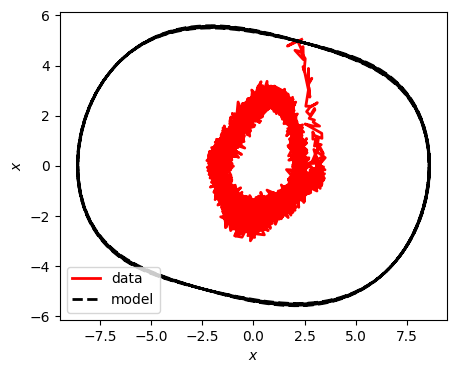

In [ ]:
# Control input

def u_fun(t):
    # return np.column_stack([np.sin(2*t)])
    return 1.0 * np.sin(2*t)

# Generate training data

dt = 0.01
t_train = np.arange(0, 50, dt)
t_train_span = (t_train[0], t_train[-1])

num_trajs = 25
x_train = [np.zeros((t_train.size, 2)) for _ in np.arange(num_trajs)]
u_train = [np.zeros((t_train.size)) for _ in np.arange(num_trajs)]
for idx_traj in tqdm(np.arange(num_trajs)):
    x0_train = list(np.sqrt(10)*np.random.normal(size=2))
    x_train[idx_traj] = sp.integrate.solve_ivp(
        ps.utils.van_der_pol_control, 
        t_train_span, 
        x0_train, 
        t_eval=t_train, 
        args=(u_fun,),
        **integrator_keywords).y.T
    x_train[idx_traj] += np.random.normal(
        scale=0.2,
        size=x_train[idx_traj].shape,
    )

    u_train[idx_traj] = u_fun(t_train)

# Fit the model 

poly_order = 5
threshold = 0.4
model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
    differentiation_method=ps.FiniteDifference(axis=-2),
    feature_names=['x', 'w', 'u'],
)
model.fit(x_train, t=dt, u=u_train, multiple_trajectories=True)
model.print()

# Simulate and plot the results

t_test = np.arange(0, 50, dt)
t_test_span = (t_test[0], t_test[-1])
u_test = u_fun(t_test)
x0_test = np.array([2, 5])
x_test = sp.integrate.solve_ivp(
    ps.utils.van_der_pol_control, 
    t_test_span, 
    x0_test, 
    t_eval=t_test, 
    args=(u_fun,),
    **integrator_keywords).y.T
x_test += np.random.normal(
    scale=0.2, 
    size=x_test.shape,
)

x_sim = model.simulate(x0_test, t_test, u=u_fun)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 1, figsize=(5, 4))
axs.plot(x_test[:, 0], x_test[:, 1], "r", label="data", **plot_kws)
axs.plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs.legend()
axs.set(xlabel="$x$", ylabel="$x$")
fig.show()

# Performance Score
# predicted vs empirical time series: 
# 1.0 (perfect predictions) or 0.0 (imperfect predictions)
r2 = skl.metrics.r2_score(x_test, x_sim)
print(f"R2: {r2}")

## Lorenz system (nonlinear ODE)

In [11]:
# Generate training data

dt = 0.001
t_train = np.arange(0, 100, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [-8, 8, 27]
x_train = sp.integrate.solve_ivp(
    ps.utils.lorenz, t_train_span,
    x0_train, t_eval=t_train, **integrator_keywords).y.T
x_dot_train_measured = np.array(
    [ps.utils.lorenz(0, x_train[i]) for i in range(t_train.size)]
)

### Measure states $x$ and derivatives $\dot{x}$ 

In [12]:
# Fit the models and simulate

poly_order = 5
threshold = 0.05

noise_levels = [1e-4, 1e-3, 1e-2, 1e-1, 1.0]

models = []
t_sim = np.arange(0, 20, dt)
x_sim = []
for eps in tqdm(noise_levels):
    model = ps.SINDy(
        optimizer=ps.STLSQ(threshold=threshold),
        feature_library=ps.PolynomialLibrary(degree=poly_order),
        feature_names=['x', 'y', 'z'],
    )
    model.fit(
        x_train, 
        t=dt, 
        x_dot=x_dot_train_measured + np.random.normal(scale=eps, size=x_train.shape),
        quiet=True,
    )
    models.append(model)
    x_sim.append(model.simulate(x_train[0], t_sim))

100%|██████████| 5/5 [00:52<00:00, 10.51s/it]


In [13]:
for i, model in enumerate(models):
    print(f"model {i} -----")
    model.print()

model 0 -----
(x)' = -10.000 x + 10.000 y
(y)' = 28.000 x + -1.000 y + -1.000 x z
(z)' = -2.667 z + 1.000 x y
model 1 -----
(x)' = -10.000 x + 10.000 y
(y)' = 28.000 x + -1.000 y + -1.000 x z
(z)' = -2.667 z + 1.000 x y
model 2 -----
(x)' = -10.000 x + 10.000 y
(y)' = 28.000 x + -1.000 y + -1.000 x z
(z)' = -2.667 z + 1.000 x y
model 3 -----
(x)' = -10.000 x + 10.000 y
(y)' = 28.000 x + -1.000 y + -1.000 x z
(z)' = -2.667 z + 1.000 x y
model 4 -----
(x)' = -10.001 x + 10.000 y
(y)' = 28.002 x + -1.001 y + -1.000 x z
(z)' = -2.667 z + 1.000 x y


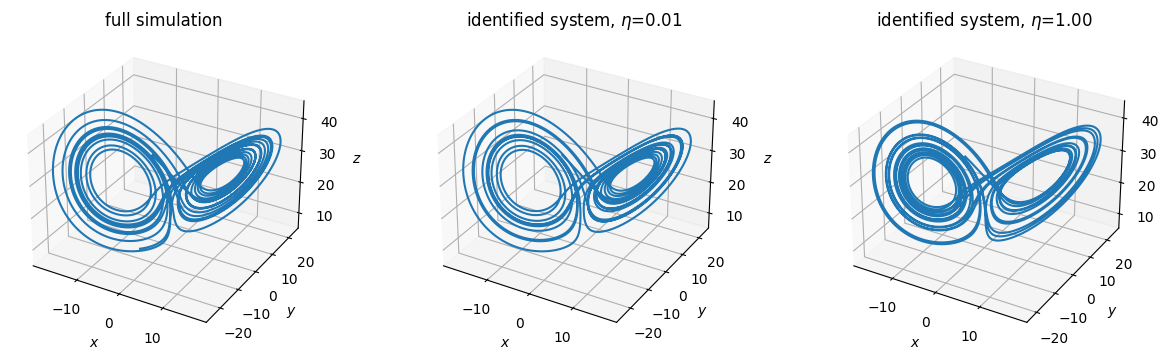

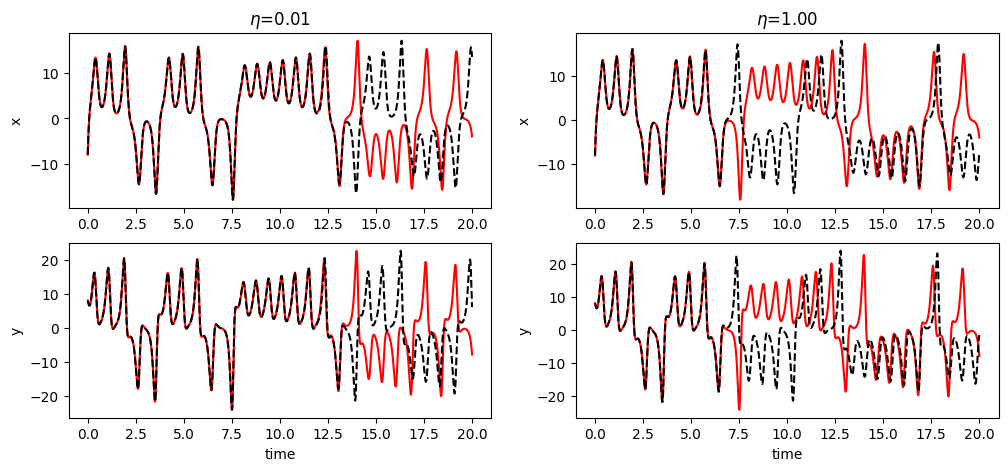

In [14]:
# Plot results

fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(131, projection="3d")
ax.plot(
    x_train[: t_sim.size, 0],
    x_train[: t_sim.size, 1],
    x_train[: t_sim.size, 2],
)
plt.title("full simulation")
ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$")

model_idx = 2
ax = fig.add_subplot(132, projection="3d")
ax.plot(x_sim[model_idx][:, 0], x_sim[model_idx][:, 1], x_sim[model_idx][:, 2])
plt.title(f"identified system, $\eta$={noise_levels[model_idx]:.2f}")
ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$")

model_idx = 4
ax = fig.add_subplot(133, projection="3d")
ax.plot(x_sim[model_idx][:, 0], x_sim[model_idx][:, 1], x_sim[model_idx][:, 2])
plt.title(f"identified system, $\eta$={noise_levels[model_idx]:.2f}")
ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$")

fig = plt.figure(figsize=(12, 5))
model_idx = 2
ax = fig.add_subplot(221)
ax.plot(t_sim, x_train[: t_sim.size, 0], "r")
ax.plot(t_sim, x_sim[model_idx][:, 0], "k--")
plt.title(f"$\eta$={noise_levels[model_idx]:.2f}")
plt.ylabel("x")

ax = fig.add_subplot(223)
ax.plot(t_sim, x_train[: t_sim.size, 1], "r")
ax.plot(t_sim, x_sim[model_idx][:, 1], "k--")
plt.xlabel("time")
plt.ylabel("y")

model_idx = 4
ax = fig.add_subplot(222)
ax.plot(t_sim, x_train[: t_sim.size, 0], "r")
ax.plot(t_sim, x_sim[model_idx][:, 0], "k--")
plt.title(f"$\eta$={noise_levels[model_idx]:.2f}")
plt.ylabel("x")

ax = fig.add_subplot(224)
ax.plot(t_sim, x_train[: t_sim.size, 1], "r")
ax.plot(t_sim, x_sim[model_idx][:, 1], "k--")
plt.xlabel("time")
plt.ylabel("y")

fig.show()

### Measure only the states $x$, compute the derivatives $\dot{x}$

In [15]:
# Fit the models and simulate

noise_levels = [1e-4, 1e-3, 1e-2, 1e-1, 1.0]

models_noD = []
t_sim = np.arange(0, 20, dt)
x_sim_noD = []
for eps in tqdm(noise_levels):
    model = ps.SINDy(
        optimizer=ps.STLSQ(threshold=threshold),
        feature_library=ps.PolynomialLibrary(degree=poly_order),
        feature_names=['x', 'y', 'z'],
    )
    model.fit(x_train + np.random.normal(scale=eps, size=x_train.shape),
              t=dt, quiet=True)
    models_noD.append(model)
    x_sim_noD.append(model.simulate(x_train[0], t_sim))

100%|██████████| 5/5 [00:51<00:00, 10.40s/it]


In [16]:
for i, model in enumerate(models_noD):
    print(f"model {i} -----")
    model.print()

model 0 -----
(x)' = -10.000 x + 10.000 y
(y)' = 27.998 x + -1.000 y + -1.000 x z
(z)' = -2.667 z + 1.000 x y
model 1 -----
(x)' = -10.000 x + 10.000 y
(y)' = 27.998 x + -1.000 y + -1.000 x z
(z)' = -2.667 z + 1.000 x y
model 2 -----
(x)' = -10.000 x + 10.000 y
(y)' = 28.001 x + -1.001 y + -1.000 x z
(z)' = -2.667 z + 1.000 x y
model 3 -----
(x)' = -9.991 x + 9.992 y
(y)' = 27.922 x + -0.973 y + -0.998 x z
(z)' = -2.666 z + 1.000 x y
model 4 -----
(x)' = 0.832 1 + 2.826 x + 2.524 y + -0.329 x z + 0.171 y z
(y)' = -0.191 1 + 24.200 x + 1.230 y + -0.889 x z + -0.064 y z
(z)' = -4.174 1 + 0.103 x + -0.076 y + -2.395 z + -0.057 x^2 + 1.024 x y


### Compare the errors in each case

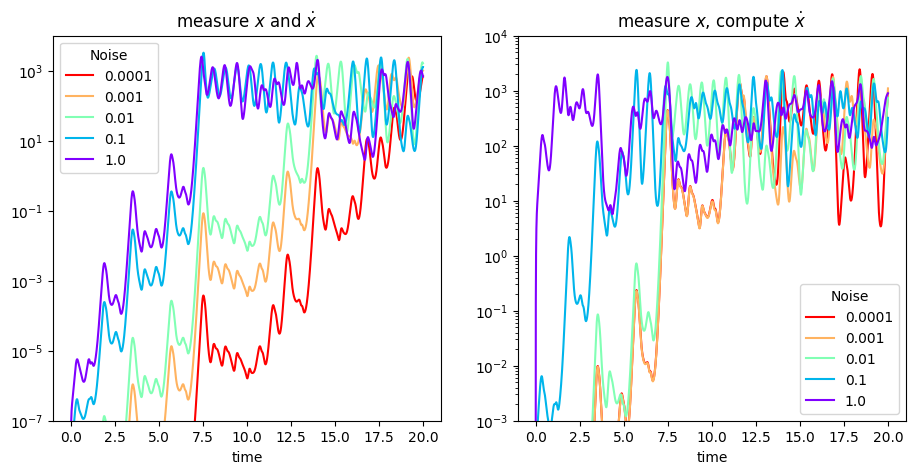

In [17]:
colors = rainbow(np.linspace(1, 0, len(models)))

fig, axs = plt.subplots(1, 2, figsize=(11, 5))
for i, x in enumerate(x_sim):
    axs[0].semilogy(
        t_sim,
        np.sum((x - x_train[: t_sim.size]) ** 2, axis=1),
        color=colors[i],
        label=noise_levels[i],
    )
axs[0].set(xlabel="time", title="measure $x$ and $\dot{x}$")
axs[0].legend(title="Noise")
axs[0].set_ylim(1e-7, 1e4)

for i, x in enumerate(x_sim_noD):
    axs[1].semilogy(
        t_sim,
        np.sum((x - x_train[: t_sim.size]) ** 2, axis=1),
        color=colors[i],
        label=noise_levels[i],
    )

axs[1].set(xlabel="time", title="measure $x$, compute $\dot{x}$")
axs[1].legend(title="Noise")
axs[1].set_ylim(1e-3, 1e4)

fig.show()

### with control inputs

In [18]:
# Control input
def u_fun(t):
    return np.column_stack([np.sin(2 * t), t ** 2])

# Generate measurement data
dt = .002

t_train = np.arange(0, 50, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [-8, 8, 27]
x_train = sp.integrate.solve_ivp(
    ps.utils.lorenz_control,
    t_train_span, 
    x0_train,
    t_eval=t_train, 
    args=(u_fun,),
    **integrator_keywords,
).y.T
u_train = u_fun(t_train)

# Instantiate and fit the SINDYc model
model = ps.SINDy(
    optimizer=optimizer,
    feature_library=ps.PolynomialLibrary(degree=5),
    differentiation_method=differentiation_method,
    feature_names=['x', 'y', 'z', 'u0', 'u1'],
)
model.fit(x_train, u=u_train, t=dt)
model.print()

NameError: name 'optimizer' is not defined

## Bifurcations and normal forms

### Logistic map

In [ ]:
# Generate training data

N = 1000
mus = [2.5, 2.75, 3, 3.25, 3.5, 3.75, 3.8, 3.85, 3.9, 3.95]
eps = 0.025
x = [np.zeros((N, 2)) for i in range(len(mus))]
for i, mu in tqdm(enumerate(mus)):
    x[i][0] = [0.5, mu]
    for k in range(1, N):
        x[i][k, 0] = np.maximum(
            np.minimum(
                mu * x[i][k - 1, 0] * (1 - x[i][k - 1, 0])
                + eps * np.random.randn(),
                1.0,
            ),
            0.0,
        )
        x[i][k, 1] = mu
x_train = x

10it [00:00, 277.21it/s]


In [ ]:
# Fit the model

optimizer = ps.STLSQ(threshold=0.1)
library = ps.PolynomialLibrary(degree=5)
model = ps.SINDy(
    optimizer=optimizer,
    feature_library=library,
    discrete_time=True,
    feature_names=['x', 'mu'],
)
model.fit(x_train, multiple_trajectories=True)
model.print()

(x)[k+1] = 0.999 x[k] mu[k] + -0.999 x[k]^2 mu[k]
(mu)[k+1] = 1.000 mu[k]


In [ ]:
# Generate test data (with stochastic forcing)

mus = np.arange(1, 4, 0.01)
x_test = np.zeros((mus.size * N, 2))
idx = 0
for mu in mus:
    xold = 0.5
    for i in range(N):
        xnew = np.maximum(
            np.minimum(
                mu * xold - mu * xold ** 2 + eps * np.random.randn(), 1.0
            ),
            0.0,
        )
        xold = xnew
    xss = xnew
    for i in range(N):
        xnew = np.maximum(
            np.minimum(
                mu * xold - mu * xold ** 2 + eps * np.random.randn(), 1.0
            ),
            0.0,
        )
        xold = xnew
        x_test[idx, 0] = xnew
        x_test[idx, 1] = mu
        idx += 1
        if np.abs(xnew - xss) < 0.001:
            break
x_test = x_test[:idx]

In [ ]:
# Simulate on test data

x_sim = np.zeros((mus.size * N, 2))
idx = 0
for mu in tqdm(mus):
    xss = model.simulate([0.5, mu], N)[-1]
    stop_condition = lambda x: np.abs(x[0] - xss[0]) < 0.001
    x = model.simulate(xss, N, stop_condition=stop_condition)
    idx_new = idx + x.shape[0]
    x_sim[idx:idx_new] = x
    idx = idx_new
x_sim = x_sim[:idx]

100%|██████████| 300/300 [02:21<00:00,  2.12it/s]


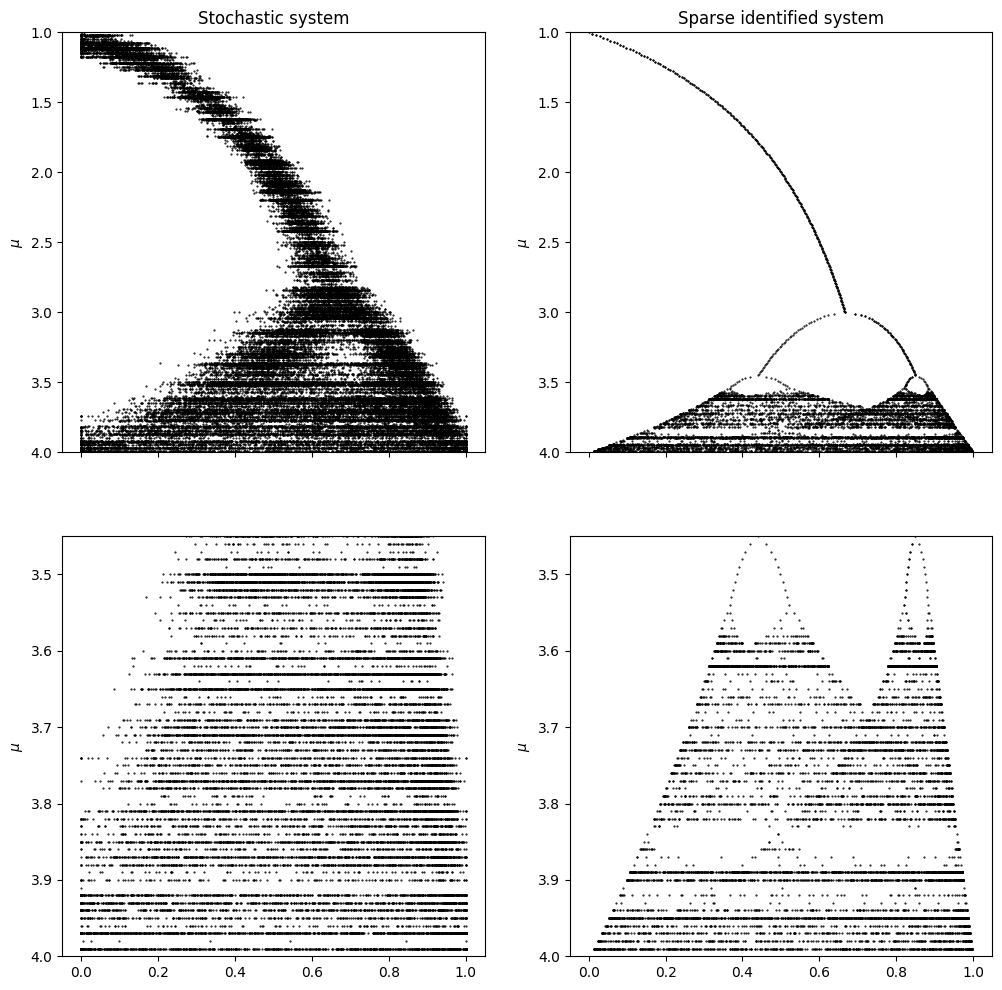

In [ ]:
# Plot results

fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharex=True)

axs[0, 0].plot(x_test[:, 0], x_test[:, 1], "k.", markersize=1)
axs[0, 0].set(
    title="Stochastic system",
    ylabel="$\mu$",
    ylim=[4, 1]
)

axs[1, 0].plot(x_test[:, 0], x_test[:, 1], "k.", markersize=1)
axs[1, 0].set(ylabel="$\mu$", ylim=[4, 3.45])

axs[0, 1].plot(x_sim[:, 0], x_sim[:, 1], "k.", markersize=1)
axs[0, 1].set(
    title="Sparse identified system",
    ylabel="$\mu$",
    ylim=[4, 1]
)

axs[1, 1].plot(x_sim[:, 0], x_sim[:, 1], "k.", markersize=1)
axs[1, 1].set(ylabel="$\mu$", ylim=[4, 3.45])

fig.show()

### Hopf normal form

In [ ]:
# Generate training data

omega = 1
A = 1

dt = 0.0025
t_train = np.arange(0, 75, dt)
t_train_span = (t_train[0], t_train[-1])

mu_stable = np.array([-0.15, -0.05])
mu_unstable = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55])

n_ics = mu_stable.size + 2 * mu_unstable.size
x_train = [np.zeros((t_train.size, 3)) for i in range(n_ics)]
eps = 0.001
ic_idx = 0

for mu in mu_stable:
    x0_train = [2, 0]
    x = sp.integrate.solve_ivp(lambda t, x: ps.utils.hopf(t, x, mu, omega, A), t_train_span,
                  x0_train, t_eval=t_train, **integrator_keywords).y.T
    x_train[ic_idx][:, 0:2] = x + eps * np.random.normal(size=x.shape)
    x_train[ic_idx][:, 2] = mu
    ic_idx += 1

for mu in mu_unstable:
    x0_train = [0.01, 0]
    x = sp.integrate.solve_ivp(lambda t, x: ps.utils.hopf(t, x, mu, omega, A), t_train_span,
                  x0_train, t_eval=t_train, **integrator_keywords).y.T
    x_train[ic_idx][:, 0:2] = x + eps * np.random.normal(size=x.shape)
    x_train[ic_idx][:, 2] = mu
    ic_idx += 1

    x0_train = [2, 0]
    x = sp.integrate.solve_ivp(lambda t, x: ps.utils.hopf(t, x, mu, omega, A), t_train_span,
                  x0_train, t_eval=t_train, **integrator_keywords).y.T
    x_train[ic_idx][:, 0:2] = x + eps * np.random.normal(size=x.shape)
    x_train[ic_idx][:, 2] = mu
    ic_idx += 1

In [ ]:
# Fit the model

differentiator = ps.SINDyDerivative(kind='finite_difference', alpha=0.05)
optimizer = ps.STLSQ(threshold=0.85)
library = ps.PolynomialLibrary(degree=5)
model = ps.SINDy(
    optimizer=optimizer, 
    feature_library=library,
    differentiation_method=differentiator, 
    feature_names=['x', 'y', 'mu'],
)
model.fit(x_train, t=dt, multiple_trajectories=True, quiet=True)
model.print()

TypeError: __init__() missing 1 required positional argument: 'k'

In [ ]:
# Simulate the model

x_sim = [np.zeros((t_train.size, 3)) for i in range(n_ics)]
ic_idx = 0

for mu in mu_stable:
    x0_train = np.array([2, 0, mu])
    x_sim[ic_idx] = model.simulate(x0_train, t_train)
    ic_idx += 1

for mu in mu_unstable:
    x0_train = np.array([0.01, 0, mu])
    x_sim[ic_idx] = model.simulate(x0_train, t_train)
    ic_idx += 1

    x0_train = np.array([2, 0, mu])
    x_sim[ic_idx] = model.simulate(x0_train, t_train)
    ic_idx += 1

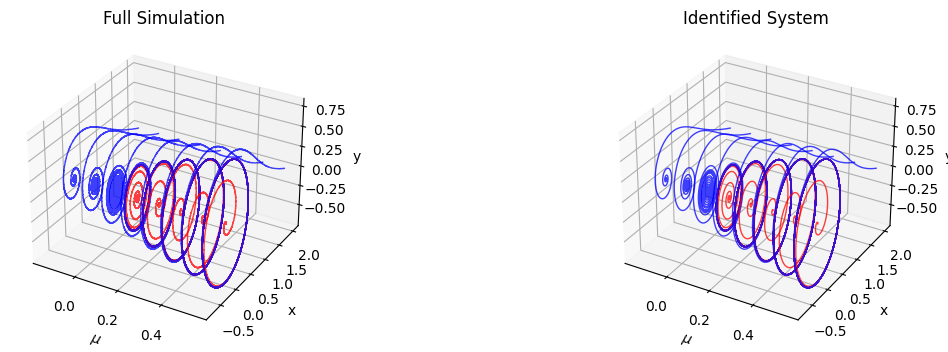

In [ ]:
# Plot results

fig = plt.figure(figsize=(14, 4))
plot_kws=dict(alpha=0.75, linewidth=1)

ax = fig.add_subplot(121, projection="3d")
for i in range(n_ics):
    if i > 2 and i % 2 == 0:
        ax.plot(
            x_train[i][:, 2], x_train[i][:, 0], x_train[i][:, 1], "r", **plot_kws)
    else:
        ax.plot(x_train[i][:, 2], x_train[i][:, 0], x_train[i][:, 1], "b", **plot_kws)

ax.set(title="Full Simulation", xlabel="$\mu$", ylabel="x", zlabel="y")

ax = fig.add_subplot(122, projection="3d")
for i in range(n_ics):
    if i > 2 and i % 2 == 0:
        ax.plot(x_sim[i][:, 2], x_sim[i][:, 0], x_sim[i][:, 1], "r", **plot_kws)
    else:
        ax.plot(x_sim[i][:, 2], x_sim[i][:, 0], x_sim[i][:, 1], "b", **plot_kws)
ax.set(title="Identified System", xlabel="$\mu$", ylabel="x", zlabel="y")

fig.show()

## custom libraries

In [19]:
import warnings
from contextlib import contextmanager
from copy import copy
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.linalg import LinAlgWarning
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import Lasso

import pysindy as ps
from pysindy.utils import enzyme
from pysindy.utils import lorenz
from pysindy.utils import lorenz_control

if __name__ != "testing":
    t_end_train = 10
    t_end_test = 15
else:
    t_end_train = 0.04
    t_end_test = 0.04

data = (Path() / "../data").resolve()


@contextmanager
def ignore_specific_warnings():
    filters = copy(warnings.filters)
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    warnings.filterwarnings("ignore", category=LinAlgWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    yield
    warnings.filters = filters

if __name__ == "testing":
    import sys
    import os
    sys.stdout = open(os.devnull, "w")

In [20]:
np.random.seed(100)

In [21]:
# Initialize integrator keywords for solve_ivp to replicate the odeint defaults
integrator_keywords = {}
integrator_keywords["rtol"] = 1e-12
integrator_keywords["method"] = "LSODA"
integrator_keywords["atol"] = 1e-12

In [22]:
# Generate measurement data
dt = 0.002

t_train = np.arange(0, t_end_train, dt)
x0_train = [-8, 8, 27]
t_train_span = (t_train[0], t_train[-1])
x_train = solve_ivp(
    lorenz, t_train_span, x0_train, t_eval=t_train, **integrator_keywords
).y.T

In [23]:
# Instantiate and fit the SINDy model
model = ps.SINDy()
model.fit(x_train, t=dt)
model.print()

(x0)' = -9.999 x0 + 9.999 x1
(x1)' = 27.992 x0 + -0.999 x1 + -1.000 x0 x2
(x2)' = -2.666 x2 + 1.000 x0 x1


In [24]:
model = ps.SINDy()
model.fit(x_train, t=dt)
model.print(lhs=["dx0/dt", "dx1/dt", "dx2/dt"])

dx0/dt = -9.999 x0 + 9.999 x1
dx1/dt = 27.992 x0 + -0.999 x1 + -1.000 x0 x2
dx2/dt = -2.666 x2 + 1.000 x0 x1


In [25]:
# Customize polynomial library
poly_library = ps.PolynomialLibrary(include_interaction=False)

model = ps.SINDy(feature_library=poly_library, optimizer=ps.STLSQ(threshold=0.5))
model.fit(x_train, t=dt)
model.print()

(x0)' = -9.999 x0 + 9.999 x1
(x1)' = -12.142 x0 + 9.349 x1
(x2)' = 85.861 1 + 0.567 x0 + -7.354 x2 + 1.366 x0^2


In [26]:
# Fourier library
fourier_library = ps.FourierLibrary(n_frequencies=3)

model = ps.SINDy(feature_library=fourier_library, optimizer=ps.STLSQ(threshold=4))
model.fit(x_train, t=dt)
model.print()

(x0)' = 6.201 cos(1 x1)
(x1)' = -4.233 cos(1 x0) + -4.817 sin(1 x2) + 7.787 cos(1 x2) + -5.604 cos(2 x0) + 4.630 cos(3 x0) + 4.569 sin(3 x2)
(x2)' = 4.982 sin(1 x0) + 4.768 sin(1 x1) + -13.709 cos(2 x1) + 4.674 sin(3 x1) + -8.713 cos(3 x1)


In [27]:
# Fully custom library
library_functions = [
    lambda x: np.exp(x),
    lambda x: 1.0 / x,
    lambda x: x,
    lambda x, y: np.sin(x + y),
]
library_function_names = [
    lambda x: "exp(" + x + ")",
    lambda x: "1/" + x,
    lambda x: x,
    lambda x, y: "sin(" + x + "," + y + ")",
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_library)
with ignore_specific_warnings():
    model.fit(x_train, t=dt)
model.print()

(x0)' = -9.999 x0 + 9.999 x1
(x1)' = 1.197 1/x0 + -50.011 1/x2 + -12.462 x0 + 9.291 x1 + 0.383 x2 + 0.882 sin(x0,x1) + 1.984 sin(x0,x2) + -0.464 sin(x1,x2)
(x2)' = 0.874 1/x0 + -8.545 1/x2 + 0.114 x0 + 0.147 x1 + 3.659 sin(x0,x1) + -3.302 sin(x0,x2) + -3.094 sin(x1,x2)


In [28]:
# Identity library
identity_library = ps.IdentityLibrary()

model = ps.SINDy(feature_library=identity_library)
model.fit(x_train, t=dt)
model.print()

(x0)' = -9.999 x0 + 9.999 x1
(x1)' = -12.450 x0 + 9.314 x1 + 0.299 x2
(x2)' = 0.257 x0


In [29]:
# Concatenate two libraries
feature_names = ["x", "y", "z"]
identity_library = ps.IdentityLibrary()
fourier_library = ps.FourierLibrary()
combined_library = identity_library + fourier_library

model = ps.SINDy(feature_library=combined_library, feature_names=feature_names)
model.fit(x_train, t=dt)
model.print()
model.get_feature_names()

(x)' = -9.999 x + 9.999 y
(y)' = -12.512 x + 9.391 y + 0.302 z + -2.969 sin(1 x) + -3.341 cos(1 x) + -1.027 sin(1 y) + -6.675 cos(1 y) + -1.752 sin(1 z) + 3.392 cos(1 z)
(z)' = 0.120 x + 0.140 y + 5.950 sin(1 x) + 2.661 cos(1 x) + 7.917 sin(1 y) + -4.030 cos(1 y) + -1.238 sin(1 z) + -0.280 cos(1 z)


['x',
 'y',
 'z',
 'sin(1 x)',
 'cos(1 x)',
 'sin(1 y)',
 'cos(1 y)',
 'sin(1 z)',
 'cos(1 z)']

In [30]:
# Tensor two libraries together
identity_library = ps.PolynomialLibrary(include_bias=False)
fourier_library = ps.FourierLibrary()
combined_library = identity_library * fourier_library

model = ps.SINDy(feature_library=combined_library, feature_names=feature_names)
model.fit(x_train, t=dt)
# model.print()  # prints out long and unobvious model
print("Feature names:\n", model.get_feature_names())

Feature names:
 ['x sin(1 x)', 'x cos(1 x)', 'x sin(1 y)', 'x cos(1 y)', 'x sin(1 z)', 'x cos(1 z)', 'y sin(1 x)', 'y cos(1 x)', 'y sin(1 y)', 'y cos(1 y)', 'y sin(1 z)', 'y cos(1 z)', 'z sin(1 x)', 'z cos(1 x)', 'z sin(1 y)', 'z cos(1 y)', 'z sin(1 z)', 'z cos(1 z)', 'x^2 sin(1 x)', 'x^2 cos(1 x)', 'x^2 sin(1 y)', 'x^2 cos(1 y)', 'x^2 sin(1 z)', 'x^2 cos(1 z)', 'x y sin(1 x)', 'x y cos(1 x)', 'x y sin(1 y)', 'x y cos(1 y)', 'x y sin(1 z)', 'x y cos(1 z)', 'x z sin(1 x)', 'x z cos(1 x)', 'x z sin(1 y)', 'x z cos(1 y)', 'x z sin(1 z)', 'x z cos(1 z)', 'y^2 sin(1 x)', 'y^2 cos(1 x)', 'y^2 sin(1 y)', 'y^2 cos(1 y)', 'y^2 sin(1 z)', 'y^2 cos(1 z)', 'y z sin(1 x)', 'y z cos(1 x)', 'y z sin(1 y)', 'y z cos(1 y)', 'y z sin(1 z)', 'y z cos(1 z)', 'z^2 sin(1 x)', 'z^2 cos(1 x)', 'z^2 sin(1 y)', 'z^2 cos(1 y)', 'z^2 sin(1 z)', 'z^2 cos(1 z)']


Create the most general and flexible possible library by combining and tensoring as many libraries as you want, and you can even specify which input variables to use to generate each library! A much more advanced example is shown further below for PDEs. One can specify: 

1. N different libraries to add together 

2. A list of inputs to use for each library. For two libraries with four inputs this would look like inputs_per_library = [[0, 1, 2, 3], [0, 1, 2, 3]] and to avoid using the first two input variables in the second library, you would change it to inputs_per_library = [[0, 1, 2, 3], [2, 3]].

3. A list of libraries to tensor together and add to the overall library. For four libraries, we could make three tensor libraries by using tensor_array = [[1, 0, 1, 1], [1, 1, 1, 1], [0, 0, 1, 1]]. The first sub-array takes the tensor product of libraries 0, 2, 3, the second takes the tensor product of all of them, and the last takes the tensor product of the libraries 2 and 3. This is a silly example since the [1, 1, 1, 1] tensor product already contains all the possible terms.

4. A list of library indices to exclude from the overall library. The first N libraries correspond to the input libraries and the subsequent indices correspond to the tensored libraries. For two libraries, exclude_libraries=[0,1] and tensor_array=[[1,1]] would result in a library consisting of only the tensor product. Note that using this is a more advanced feature, but with the benefit that it allows any SINDy library you want.

In [31]:
# Initialize two libraries
poly_library = ps.PolynomialLibrary(include_bias=False)
fourier_library = ps.FourierLibrary()

# Initialize the default inputs, but
# don't use the x0 input for generating the Fourier library
# inputs_per_library = [[0, 1, 2], [1, 2]]

# Tensor all the polynomial and Fourier library terms together
tensor_array = [[1, 1]]

# Initialize this generalized library, all the work hidden from the user!
generalized_library = ps.GeneralizedLibrary(
    [poly_library, fourier_library],
    tensor_array=tensor_array,
    exclude_libraries=[],
    # inputs_per_library=inputs_per_library,
)

# Fit the model and print the library feature names to check success
model = ps.SINDy(feature_library=generalized_library, feature_names=feature_names)
model.fit(x_train, t=dt)
model.print()
print("Feature names:\n", model.get_feature_names())

(x)' = -9.999 x + 9.999 y
(y)' = 27.992 x + -0.999 y + -1.000 x z
(z)' = -2.666 z + 1.000 x y
Feature names:
 ['x', 'y', 'z', 'x^2', 'x y', 'x z', 'y^2', 'y z', 'z^2', 'sin(1 x)', 'cos(1 x)', 'sin(1 y)', 'cos(1 y)', 'sin(1 z)', 'cos(1 z)', 'x sin(1 x)', 'x cos(1 x)', 'x sin(1 y)', 'x cos(1 y)', 'x sin(1 z)', 'x cos(1 z)', 'y sin(1 x)', 'y cos(1 x)', 'y sin(1 y)', 'y cos(1 y)', 'y sin(1 z)', 'y cos(1 z)', 'z sin(1 x)', 'z cos(1 x)', 'z sin(1 y)', 'z cos(1 y)', 'z sin(1 z)', 'z cos(1 z)', 'x^2 sin(1 x)', 'x^2 cos(1 x)', 'x^2 sin(1 y)', 'x^2 cos(1 y)', 'x^2 sin(1 z)', 'x^2 cos(1 z)', 'x y sin(1 x)', 'x y cos(1 x)', 'x y sin(1 y)', 'x y cos(1 y)', 'x y sin(1 z)', 'x y cos(1 z)', 'x z sin(1 x)', 'x z cos(1 x)', 'x z sin(1 y)', 'x z cos(1 y)', 'x z sin(1 z)', 'x z cos(1 z)', 'y^2 sin(1 x)', 'y^2 cos(1 x)', 'y^2 sin(1 y)', 'y^2 cos(1 y)', 'y^2 sin(1 z)', 'y^2 cos(1 z)', 'y z sin(1 x)', 'y z cos(1 x)', 'y z sin(1 y)', 'y z cos(1 y)', 'y z sin(1 z)', 'y z cos(1 z)', 'z^2 sin(1 x)', 'z^2 cos(1 x

## quasiperiodic systems

In [32]:
import warnings
from contextlib import contextmanager
from copy import copy
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pysindy as ps 
from scipy.integrate import solve_ivp
from scipy.linalg import LinAlgWarning
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import Lasso

# Integrator keywords for solve_ivp
integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

@contextmanager
def ignore_specific_warnings():
    filters = copy(warnings.filters)
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    warnings.filterwarnings("ignore", category=LinAlgWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    yield
    warnings.filters = filters

if __name__ == "testing":
    import sys
    import os
    sys.stdout = open(os.devnull, "w")

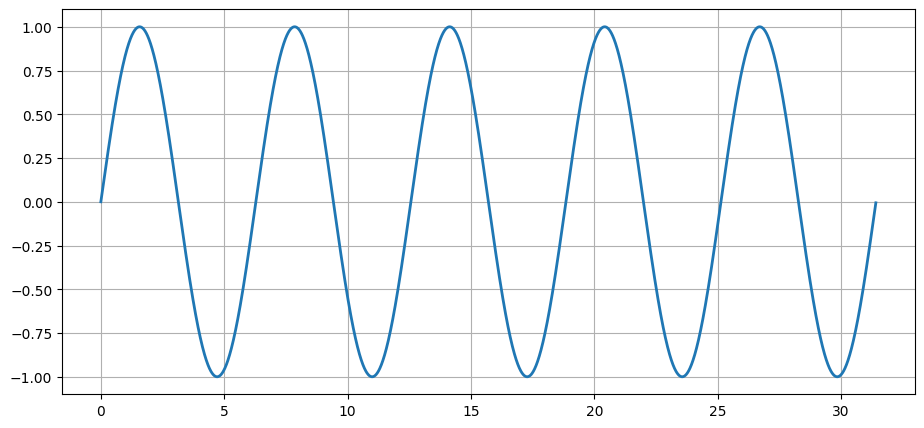

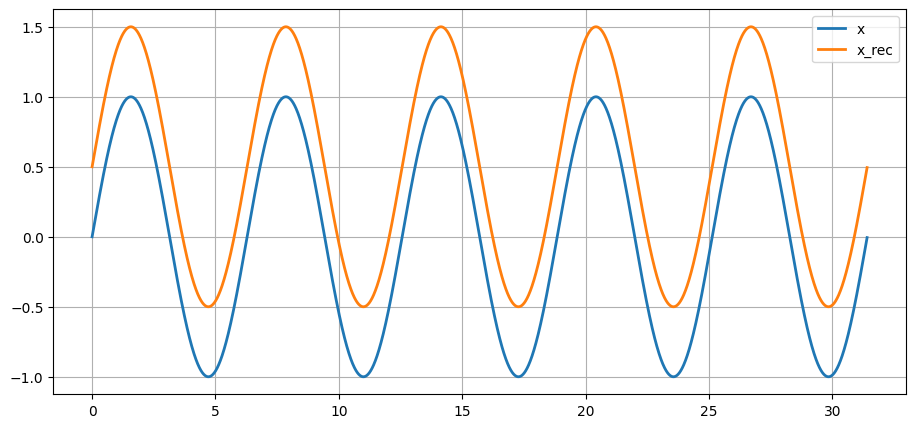

In [33]:
t_end = 10*np.pi
dt = 0.01
t = np.arange(0.0, t_end, dt)
t_span = (t[0], t[-1])

A, B = 1, 0
x = np.sin(A*t) + np.sin(B*t)

plot_kws = dict(linewidth=2)
fig, axs = plt.subplots(1, 1, figsize=(11, 5))
ax = axs
ax.plot(t, x, **plot_kws)
# axs.legend()
ax.grid(True)
def dxdt(t, x):
    return A*np.cos(A*t) + B*np.cos(B*t)
    # return np.sin(A*x)

x_rec = sp.integrate.solve_ivp(
    dxdt, 
    t_span, 
    [0.5],
    t_eval=t,
    **integrator_keywords,
).y.T

plot_kws = dict(linewidth=2)
fig, axs = plt.subplots(1, 1, figsize=(11, 5))
ax = axs
ax.plot(t, x, **plot_kws, label='x')
ax.plot(t, x_rec, **plot_kws, label='x_rec')
axs.legend()
ax.grid(True)

(x)' = 0.000


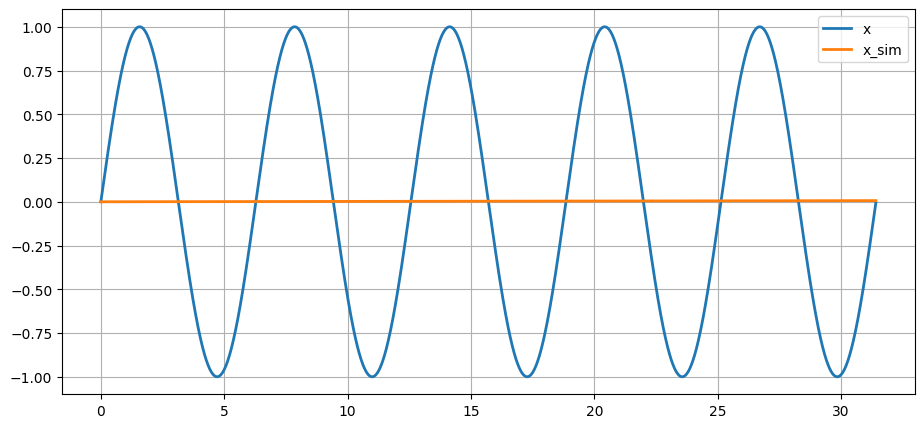

In [34]:
t_train = t
x_train = x[:, None] #= np.array([[0.,-1],[1.,0.],[2.,-1.]])

C, D, E = 10.0, 15.0, 20.0
library_functions = [
    lambda x: A*np.cos(A*x),
    lambda x: B*np.cos(B*x),
    # lambda x: C*np.cos(C*x),
    # lambda x: D*np.cos(D*x),
    # lambda x: E*np.cos(E*x),
]
library_function_names = [
    lambda x: "Acos(A" + x + ")",
    lambda x: "Bcos(B" + x + ")",
    # lambda x: "Ccos(C" + x + ")",
    # lambda x: "Dcos(D" + x + ")",
    # lambda x: "Ecos(E" + x + ")",
]
lib = ps.CustomLibrary(
    library_functions=library_functions,
    function_names=library_function_names,
).fit(x_train)
lib.transform(x_train)
lib.get_feature_names()

model = ps.SINDy(
    feature_library=lib,
    feature_names=['x'],
    optimizer=ps.STLSQ(0.0),
)
model.fit(x_train, t=dt)
model.print()

x_sim = model.simulate(x_train[0], t=t_train)

plot_kws = dict(linewidth=2)
fig, axs = plt.subplots(1, 1, figsize=(11, 5))
ax = axs
ax.plot(t, x_train, **plot_kws, label='x')
ax.plot(t, x_sim, **plot_kws, label='x_sim')
axs.legend()
ax.grid(True)

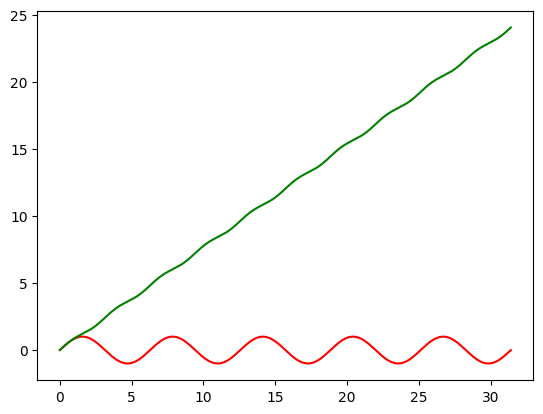

In [35]:
xdot = np.sum(model.feature_library.transform(x_train), axis=-1)
x_rec = np.concatenate([x_train[0]+np.cumsum(xdot)*dt])

plt.plot(t_train, x_train, 'r')
plt.plot(t_train, x_rec, 'g')

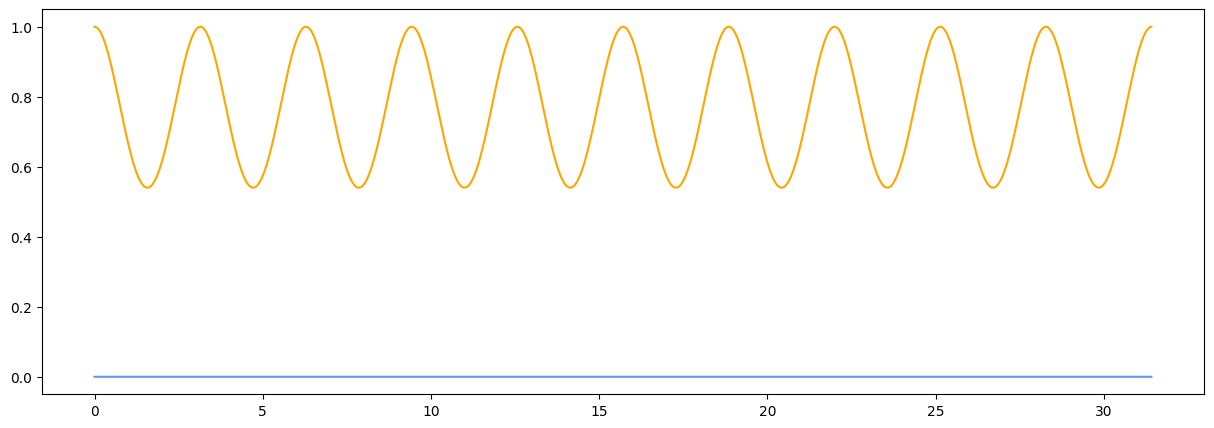

In [36]:
xdot = model.feature_library.transform(x_train)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(t_train, xdot[:, 0],  c='orange', )
ax.plot(t_train, xdot[:, 1], c='cornflowerblue')

### 2D ODE

In [37]:
import warnings
from contextlib import contextmanager
from copy import copy
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pysindy as ps 
from scipy.integrate import solve_ivp
from scipy.linalg import LinAlgWarning
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import Lasso

# Integrator keywords for solve_ivp
integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

@contextmanager
def ignore_specific_warnings():
    filters = copy(warnings.filters)
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    warnings.filterwarnings("ignore", category=LinAlgWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    yield
    warnings.filters = filters

if __name__ == "testing":
    import sys
    import os
    sys.stdout = open(os.devnull, "w")

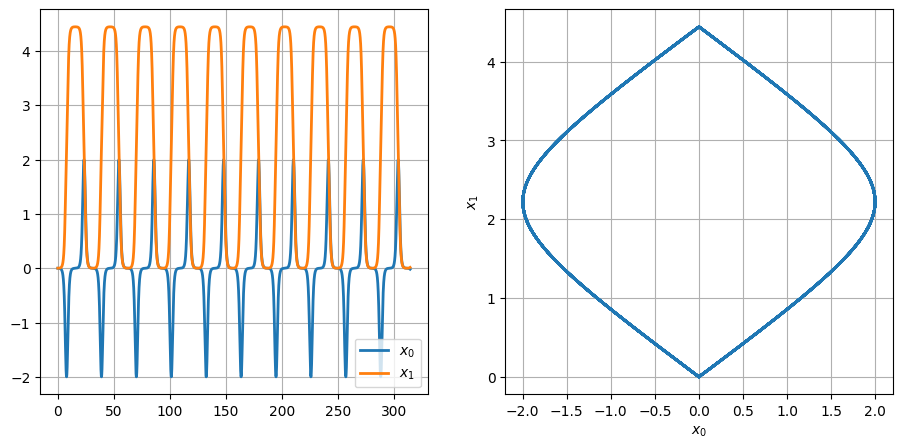

In [38]:
t_end = 100*np.pi
dt = 0.01
t = np.arange(0.0, t_end, dt)
t_span = (t[0], t[-1])

A, B = 1, np.sqrt(2)
def dxdt(t, x):
    return [-np.sin(B*x[1]), -np.sin(A*x[0])]

x_rec = sp.integrate.solve_ivp(
    dxdt, 
    t_span, 
    [0.0, 0.001],
    t_eval=t,
    **integrator_keywords,
).y.T

plot_kws = dict(linewidth=2)
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
ax = axs[0]
# ax.plot(t, x, **plot_kws, label='x')
ax.plot(t, x_rec[:, 0], **plot_kws, label='$x_0$')
ax.plot(t, x_rec[:, 1], **plot_kws, label='$x_1$')
ax.legend()
ax.grid(True)

ax = axs[1]
ax.plot(x_rec[:, 0], x_rec[:, 1], **plot_kws)
ax.set(xlabel='$x_0$', ylabel='$x_1$')
ax.grid(True)